Objetivo:
Criar um moelo de machine learning no python para que seja usado no streamlit


a ideia é que o usuário possa alterar os paremetro e ver os resultados do modelo como
percentual de chance de ter problema cardiaco
importancia das variaveis
curva roc
matriz de confusão
acuracia
erro do modelo
precisão do modelo

In [30]:
#Bibliotecas utilizadas

#tratamento de dados
import pandas as pd
import numpy as np

#Visualização de dados (gráficos)
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import shap


#Para Machine Learning
from sklearn.model_selection import train_test_split  #para treino dos dados
from sklearn.metrics import classification_report, confusion_matrix #para avaliar o resultados do modelo
from sklearn.inspection import permutation_importance #para avaliar a importancia das variaveis para o modelo
from sklearn.ensemble import RandomForestClassifier #modelo ml de arvores aleatórias


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [3]:
#Carregando o arquivo
df = pd.read_csv("cardio_train.csv", encoding="utf-8", sep=",", index_col=0)


**Dicionário de dados do arquivo:**

|     Colunas    |Descrição                                 |Opções                              |
|----------------|------------------------------------------|------------------------------------|
|id              |`identificador do usuário`                |  -                                 |
|age             |`idade do usuário - em dias "alterado para anos` -              |  -                                 |            
|gender          |`gênero do usuário`                       |`(1= mulher , 2= homem)`            |
|height          |`altura em centimentros`                  |  -                                 |    
|weight          |`peso em kilos`                           |  -                                 |
|ap_hi           |`Pressão arterial sistólica`              |  -                                 |
|ap_lo           |`Pressão arterial diastólica`             |  -                                 |
|Cholesterol     |`Colesterol`                              |`1-Normal, 2-Acima do normal, 3-Bem acima do normal)`|
|gluc            |`Glicose`                                 |`1-Normal, 2-Acima do normal, 3-Bem acima do normal)`|
|smoke           |`Fumante?`                                |`1-Sim , 2-Não`                    |
|alco            |`Faz ingestão de alcóol?`                 |`1-Sim , 2-Não`                    |
|active          |` Pratica atividade física`               |`1-Sim , 2-Não`                    |
|cardio          |`Presença de doença cardiovascular?`      |`1-Sim , 2-Não`                    |





In [3]:
#Avaliando as colunas do arquivo
df.head(3)

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1

In [4]:
#Transformando a coluna de idade em anos
df['age'] = (df['age']/365).round(0).astype('Int64')


In [5]:
#avaliando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  Int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: Int64(1), float64(1), int64(11)
memory usage: 7.5 MB


In [6]:
#Avaliando se possui valores nulos
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
#Avaliando os dados para identificar possiveis erros
df.describe()

id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900     53.338686      1.349571    164.359229     74.205690   
std    28851.302323      6.765294      0.476838      8.210126     14.395757   
min        0.000000     30.000000      1.000000     55.000000     10.000000   
25%    25006.750000     48.000000      1.000000    159.000000     65.000000   
50%    50001.500000     54.000000      1.000000    165.000000     72.000000   
75%    74889.250000     58.000000      2.000000    170.000000     82.000000   
max    99999.000000     65.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

**2-Analise exploratória dos dados**

**2.1-Dados númerícos**

In [8]:
#Avaliando a distribuição dos dados do tipo numericos
fig = make_subplots(rows=4, cols=1)

fig.add_trace(go.Box(x=df["age"], name="Idade"), row=1, col=1)
fig.add_trace(go.Box(x=df["weight"], name="Peso"), row=2, col=1)
fig.add_trace(go.Box(x=df["ap_hi"], name="Pressão sanguínea sistólica"), row=3, col=1)
fig.add_trace(go.Box(x=df["ap_lo"], name="Pressão sanguínea diastólica"), row=4, col=1)

fig.update_layout(height=700)
fig.show()

#Idade
#Outiliers abaixo de 40 anos
#Outiliers acima de 108 kg e abaixo 39kg

**2.2 Avaliando dados categoricos**

In [9]:
fig = make_subplots(rows=2, cols=3)

# Calculate the percentage for each category
gender_percent = df["gender"].value_counts(normalize=True) * 100
cholesterol_percent = df["cholesterol"].value_counts(normalize=True) * 100
gluc_percent = df["gluc"].value_counts(normalize=True) * 100
smoke_percent = df["smoke"].value_counts(normalize=True) * 100
alco_percent = df["alco"].value_counts(normalize=True) * 100
active_percent = df["active"].value_counts(normalize=True) * 100

# Add traces to the figure
fig.add_trace(go.Bar(y=gender_percent, x=["Feminino", "Masculino"], name="Genero"), row=1, col=1)
fig.add_trace(go.Bar(y=cholesterol_percent, x=["Normal", "Acima do Normal", "Muito acima do normal"], name="Cholesterol"), row=1, col=2)
fig.add_trace(go.Bar(y=gluc_percent, x=["Normal", "Acima do Normal", "Muito acima do normal"], name="Glicose"), row=1, col=3)
fig.add_trace(go.Bar(y=smoke_percent, x=["Não fumante", "Fumante"], name="Fumante"), row=2, col=1)
fig.add_trace(go.Bar(y=alco_percent, x=["Não Alcoólatra", "Alcoólatra"], name="Alcoólatra"), row=2, col=2)
fig.add_trace(go.Bar(y=active_percent, x=["Não Ativo", "Ativo"], name="Pratica atividade visica"), row=2, col=3)

# Update the layout and show the figure
fig.update_layout(template="plotly_dark", height=700)
fig.show()

In [10]:
#Avaliando como esta dividido a variavel preditora
cardio_percent = df["cardio"].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
print(cardio_percent)

#Os valores estão bem divididos

0    50.03%
1    49.97%
Name: cardio, dtype: object


<AxesSubplot:>

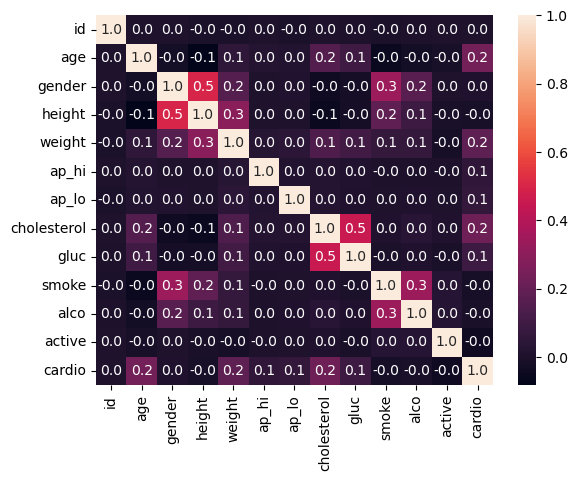

In [11]:
# Análise de correlação

correlacao = df.corr()

# plot da matriz de correlação

plot = sns.heatmap(correlacao, annot = True, fmt=".1f")
plot

**3.0-Machine Learning**

**3.1-Preparação dos dados**

In [13]:
#Separando os dados , valor preditor e variaveis
Y = df["cardio"]
X = df.drop(["cardio", "id"], axis=1)
    

In [18]:
#Treinando os dados 70% para treino e 30% para treino  
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

#Random_state apenas para ter uma amostra igual porem pode remover

**3.2-Treinando o Modelo**

In [20]:
#instanciando o modelo
ml_model = RandomForestClassifier(n_estimators=20 , n_jobs=4, max_depth=4)

#aplicando o modelo
ml_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=20, n_jobs=4)

**3.3-Avaliação do modelo**

In [22]:
#Aplicando a predição em todos os valores de test
predictions = ml_model.predict(x_test)

In [25]:
#Avaliando os resultados do modelo
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))

#O modelo tem uma precisão de 73%


              precision    recall  f1-score   support

           0       0.70      0.80      0.75     10461
           1       0.77      0.67      0.71     10539

    accuracy                           0.73     21000
   macro avg       0.74      0.73      0.73     21000
weighted avg       0.74      0.73      0.73     21000

[[8356 2105]
 [3530 7009]]


**3.4- Feature Importance**

In [28]:
#Calculando a importancia das variaveis
result = permutation_importance(ml_model, x_test, y_test, n_repeats=10, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

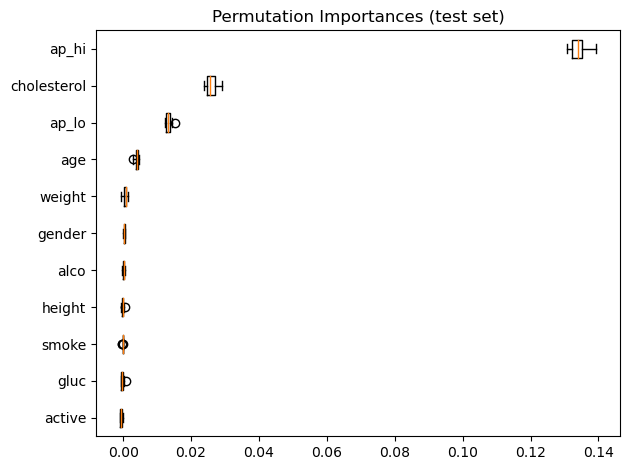

In [29]:
#Grafico para avaliar a importancia das variaveis
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=x_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

#Variavel com maior importancia Pressão alterial 

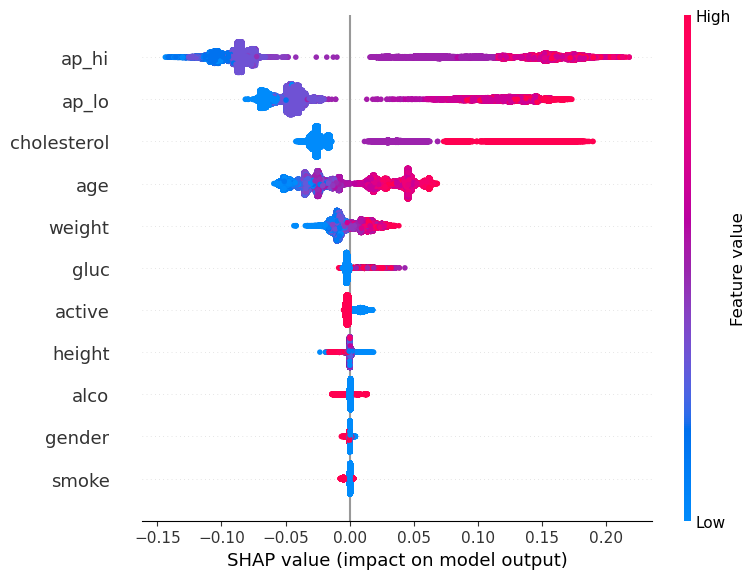

In [31]:
#Grafico de outra forma mais pratico de avaliar
explainer = shap.TreeExplainer(ml_model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values[1], X)

#Quando variavel para direita esta impactando positivamente a decisão final do modelo
#Nesse caso quando a pressão for alta (vermelho) tem grande possibilidade de ter problemas cardiacos

In [38]:

#avaliando o usuário
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[0][0], x_train.iloc[0])